In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# One-by-one add tricks

In [19]:
df = pd.read_csv("./build/results1.csv")

In [20]:
df.columns

Index(['Unnamed: 0', 'HEURISTIC_STOP', 'REMOVE_DEAD_FIELDS', 'REMOVE_2_LINE',
       'REMOVE_LINE_WITH_2x1_DEGREE', 'ONE_WAY', 'TRANSPOSITION_TABLE',
       'ISOMORPHIC_TABLE', 'HEURISTIC_PN_DN_INIT', 'col', 'time', 'tree_size'],
      dtype='object')

In [21]:
df[df["col"]==7]

,Unnamed: 0,HEURISTIC_STOP,REMOVE_DEAD_FIELDS,REMOVE_2_LINE,REMOVE_LINE_WITH_2x1_DEGREE,ONE_WAY,TRANSPOSITION_TABLE,ISOMORPHIC_TABLE,HEURISTIC_PN_DN_INIT,col,time,tree_size
0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.307445,178985.0
1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.270032,161821.0
2,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0,0.118246,68697.0
3,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7.0,0.183366,114162.0
4,4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0,0.024545,12688.0
5,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7.0,0.258798,180948.0
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,0.295048,181746.0
7,7,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,7.0,0.021483,4967.0
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.273098,180948.0


In [22]:
base_args = ['HEURISTIC_STOP', 'REMOVE_DEAD_FIELDS', 'REMOVE_2_LINE',
       'REMOVE_LINE_WITH_2x1_DEGREE', 'ONE_WAY', 'TRANSPOSITION_TABLE',
       'ISOMORPHIC_TABLE', 'HEURISTIC_PN_DN_INIT']

In [23]:
#for i in range(len(df)):
#    print(df.loc[i][df.loc[i]==1])
list(df.loc[0].dropna().keys())

['Unnamed: 0', 'HEURISTIC_STOP', 'col', 'time', 'tree_size']

In [29]:

def get_labels(df, col):
    labels = []
    for i in range(len(df[df["col"]==col])):
        keys = [a for a in df.loc[i].dropna().keys() if a in base_args]
        if(len(keys)==0):
            labels.append('vanilla-PNS')
        elif(len(keys)==1):
            labels+=keys
        else:
            labels.append('all')
    #print(labels)
    return labels

[0 1 2 3 4 5 6 7 8] ['HEURISTIC_STOP', 'REMOVE_DEAD_FIELDS', 'REMOVE_2_LINE', 'REMOVE_LINE_WITH_2x1_DEGREE', 'ONE_WAY', 'TRANSPOSITION_TABLE', 'HEURISTIC_PN_DN_INIT', 'all', 'vanilla-PNS']


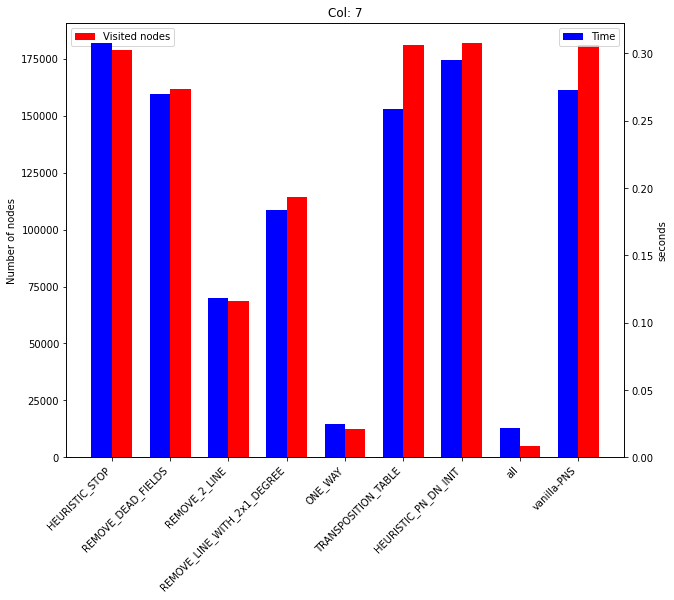

[0 1 2 3 4 5 6 7 8] ['HEURISTIC_STOP', 'REMOVE_DEAD_FIELDS', 'REMOVE_2_LINE', 'REMOVE_LINE_WITH_2x1_DEGREE', 'ONE_WAY', 'TRANSPOSITION_TABLE', 'HEURISTIC_PN_DN_INIT', 'all', 'vanilla-PNS']


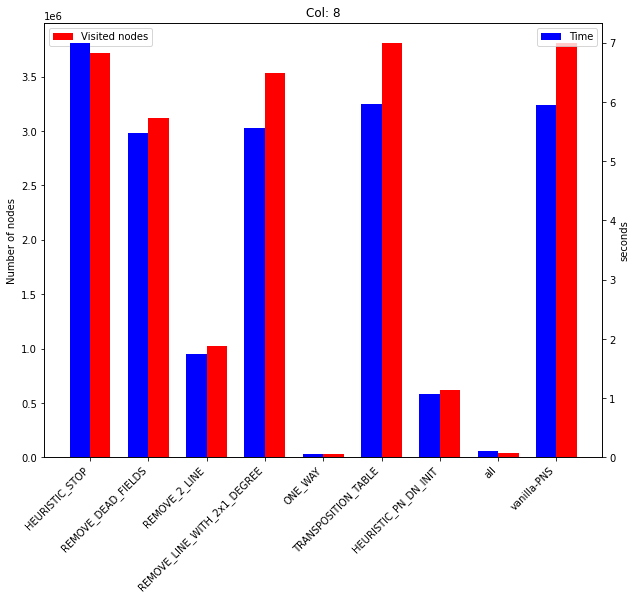

In [30]:
for col in [7,8]:
    plt.figure(figsize=(10,8))
    width = 0.35
    labels = get_labels(df, col)
    x = np.arange(len(labels))
    print(x, labels)

    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    lns1 = ax1.bar(x+width/2, df[df["col"]==col]["tree_size"], width, color = "r", label="Visited nodes")
    ax1.set_ylabel("Number of nodes")
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    #ax1.xticks()

    lns2= ax2.bar(x-width/2, df[df["col"]==col]["time"], width, color="b", label="Time")
    ax2.set_ylabel("seconds")

    ax1.legend()
    ax2.legend(loc=0)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    
    plt.title("Col: {}".format(col))
    plt.show()

# One-by-one remove tricks

In [10]:
df = pd.read_csv("./build/results2.csv")

In [16]:
def get_labels2(df, col):
    labels = []
    for i in range(len(df[df["col"]==col])):
        keys = [a for a in df.loc[i].dropna().keys() if a not in base_args]
        #print(keys)
        if(len(keys)==1):
            labels+=keys
        else:
            labels.append('all')
    #print(labels)
    return labels

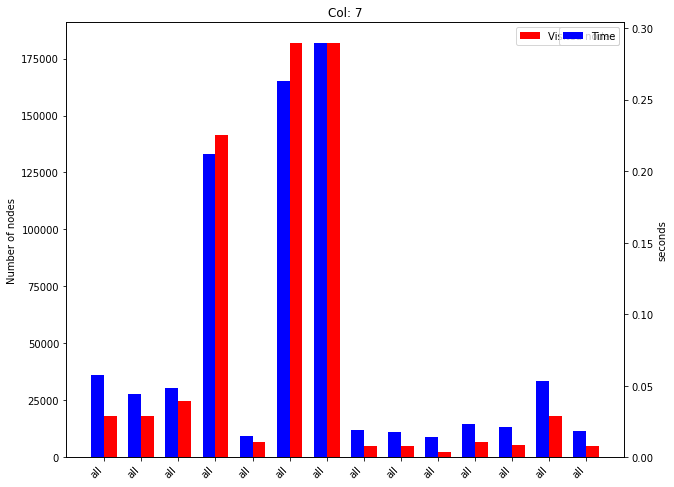

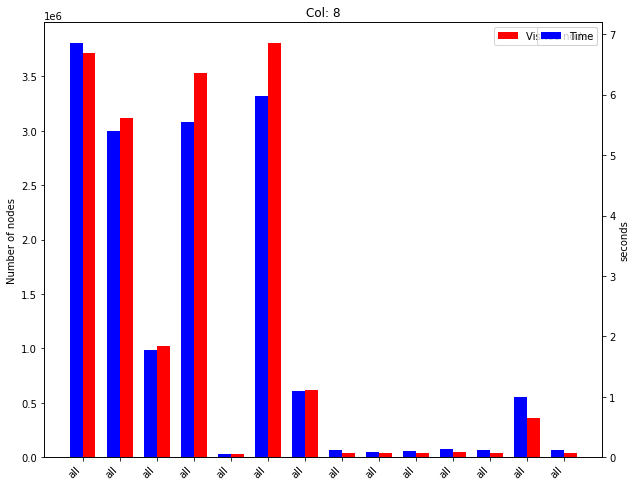

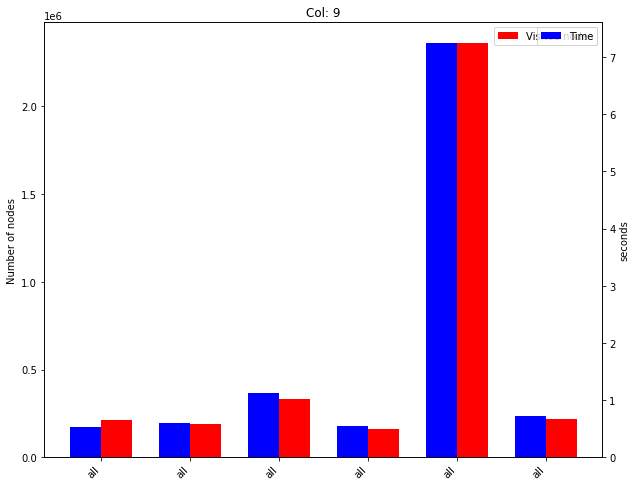

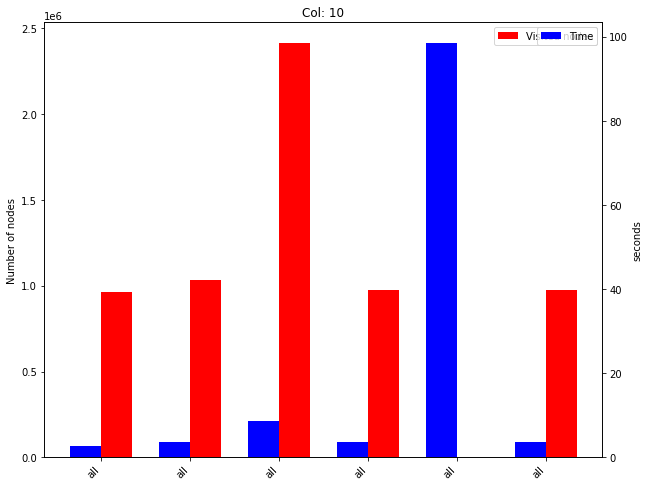

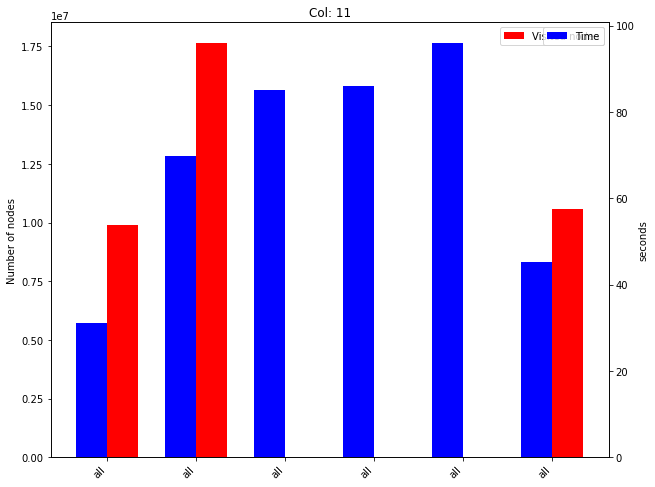

In [17]:
for col in [7,8,9,10,11]:
    plt.figure(figsize=(10,8))
    width = 0.35
    labels = get_labels2(df, col)
    x = np.arange(len(labels))
    #print(x, labels)

    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    lns1 = ax1.bar(x+width/2, df[df["col"]==col]["tree_size"], width, color = "r", label="Visited nodes")
    ax1.set_ylabel("Number of nodes")
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    #ax1.xticks()

    lns2= ax2.bar(x-width/2, df[df["col"]==col]["time"], width, color="b", label="Time")
    ax2.set_ylabel("seconds")

    ax1.legend()
    ax2.legend(loc=0)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    
    plt.title("Col: {}".format(col))
    plt.show()